# Craigslist Analysis
### Steven Nasseri


### 1.	What is the distribution of car colors? which are most/least prevalent
### 2.	Is the relationship between price and miles very strong?
### 3.	How many different brands were captured? which was the most/least common?
### 4.	Which car brand has the most and least expensive cars on average?
### 5.	What’s the relationship between price and color? which colors are most and least expensive?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
## import data from csv
df = pd.read_csv('craigslist_data.csv')

### 1.	What is the distribution of car colors? which are most/least prevalent

In [50]:
def get_counts(df, col):
    # view count of paint colors
    counts = df[col].value_counts()
    print(counts)

    names = ['', '']
    highLow = [0, 300]
    for item, count in counts.items():
        if count > highLow[0]:
            highLow[0] = count
            names[0] = item
        if count < highLow[1]:
            highLow[1] = count
            names[1] = item

    print(f'\n\nHighest: {names[0]} - {highLow[0]}\nLowest: {names[1]} - {highLow[1]}')

    # return names and highLow
    return names, highLow

names, highLow = get_counts(df, 'paint color')


paint color
white     214
black     199
silver    100
blue       97
grey       95
red        79
green      30
custom     23
brown      12
orange      7
yellow      6
purple      2
Name: count, dtype: int64


Highest: white - 214
Lowest: purple - 2


/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/3758691874.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/3758691874.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


[Text(0, 0.0, '0'),
 Text(0, 25.0, '25'),
 Text(0, 50.0, '50'),
 Text(0, 75.0, '75'),
 Text(0, 100.0, '100'),
 Text(0, 125.0, '125'),
 Text(0, 150.0, '150'),
 Text(0, 175.0, '175'),
 Text(0, 200.0, '200'),
 Text(0, 225.0, '225')]

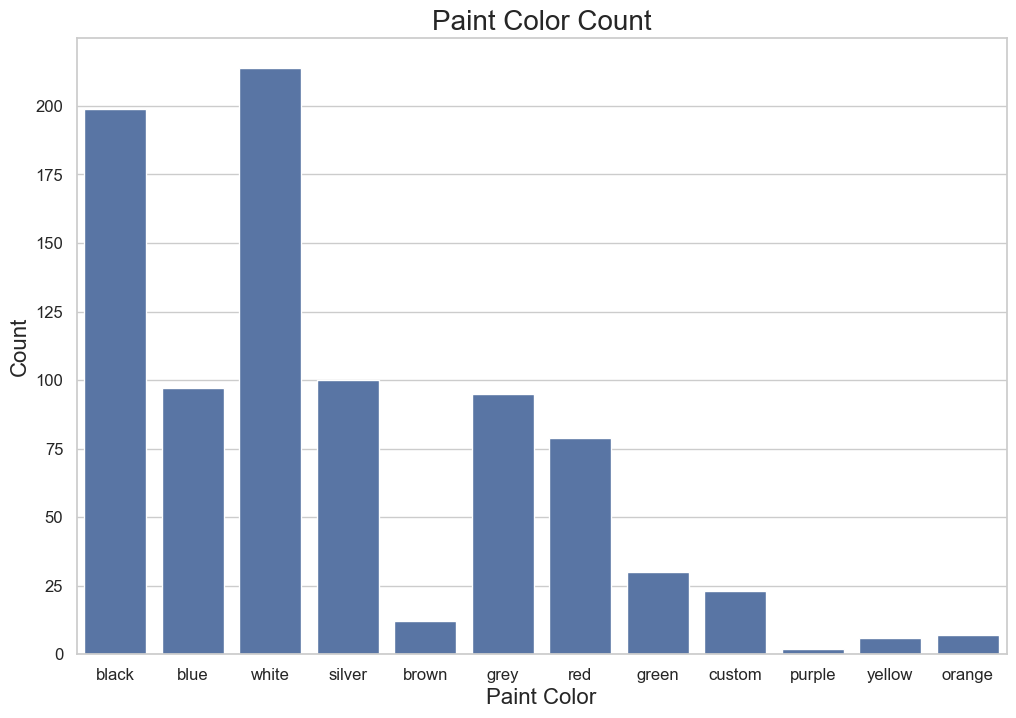

In [65]:
## plot data

# set up figure
fig, ax = plt.subplots(figsize=(12, 8))

# plot data
sns.countplot(data=df, x='paint color', ax=ax)

# set title
ax.set_title('Paint Color Count', fontsize=20)

# set x and y labels
ax.set_xlabel('Paint Color', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

# set x and y tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)



### 2.	Is the relationship between price and miles very strong?

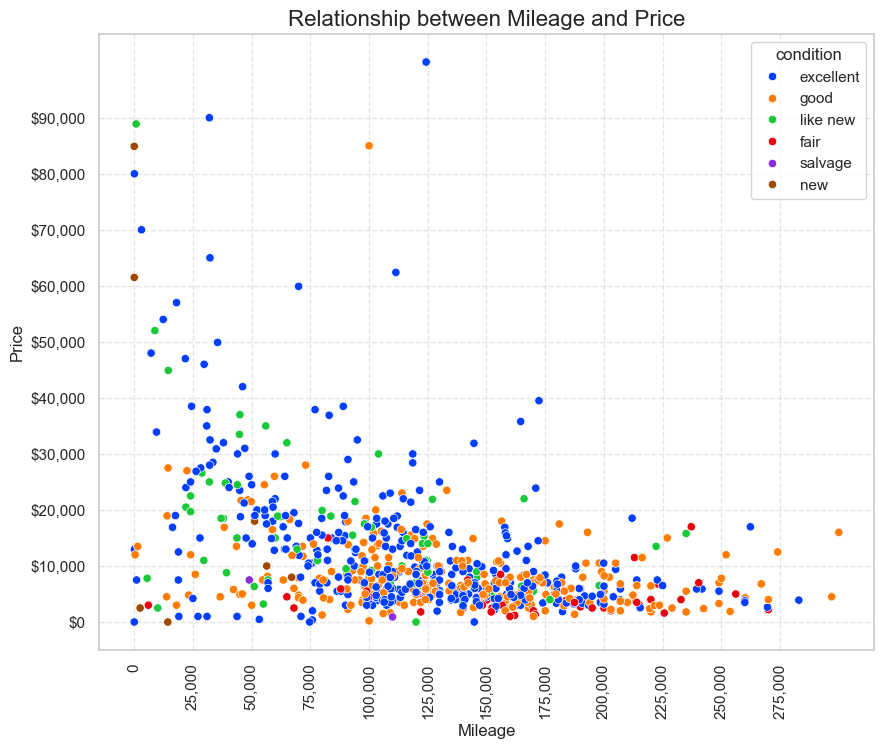

In [35]:

# Filter the data
df_subset = df[(df['price'] <= 110000) & (df['odometer'] <= 300000)]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='odometer', y='price', data=df_subset, hue='condition', palette='bright')

# Set the title and labels
plt.title('Relationship between Mileage and Price', fontsize=16)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Customize the tick labels
plt.xticks(np.arange(0, 300000, 25000), labels=['{:,}'.format(x) for x in np.arange(0, 300000, 25000)], rotation=90)
plt.yticks(np.arange(0, 100000, 10000), labels=['${:,.0f}'.format(y) for y in np.arange(0, 100000, 10000)])

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


### 3.	How many different brands were captured? which was the most/least common?

In [66]:
## count total number of brands captured
names, highLow = get_counts(df, 'brand')

brand_count = 0
for brand in df['brand'].unique():
    brand_count += 1

print(f'\n\nTotal number of brands captured: {brand_count}\n'
      f'Highest: {names[0]} - {highLow[0]}\nLowest: {names[1]} - {highLow[1]}')



brand
ford             175
honda             78
nissan            73
toyota            71
chevrolet         70
bmw               69
jeep              55
hyundai           48
dodge             36
chevy             36
volkswagen        30
ram               29
subaru            29
gmc               28
kia               26
mercedes-benz     23
mazda             21
lexus             20
audi              18
cadillac          17
chrysler          16
infiniti          15
acura             14
mini              12
pontiac           11
land rover         9
volvo              9
porsche            4
mitsubishi         3
jaguar             3
buick              3
saab               2
maserati           2
fiat               2
ferrari            2
hummer             2
tesla              2
citroen            1
alfa romeo         1
Name: count, dtype: int64


Highest: ford - 175
Lowest: citroen - 1


Total number of brands captured: 40
Highest: ford - 175
Lowest: citroen - 1


### 4.	Which car brand has the most and least expensive cars on average?

/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/3819664361.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(x='price', y='brand', data=df_subset, ci=0, palette="Blues_d")
/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/3819664361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price', y='brand', data=df_subset, ci=0, palette="Blues_d")
/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/3819664361.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()], fontsize=10)
/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/3819664361.py:21: UserWarning:

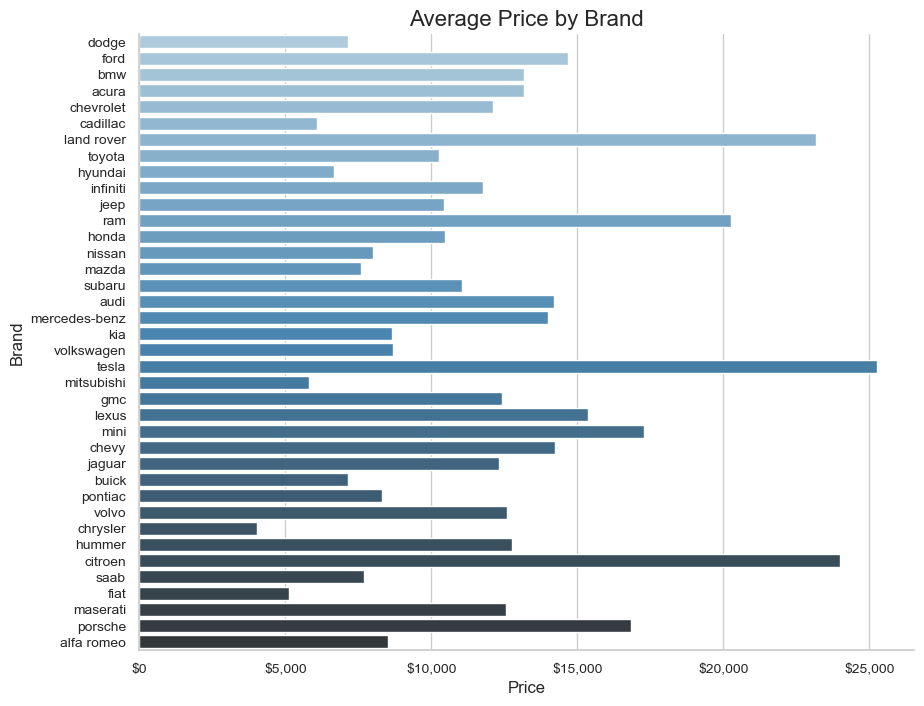

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Filter the data
df_subset = df[(df['price'] <= 80000) & (df['brand'] != 'other')]

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='price', y='brand', data=df_subset, ci=0, palette="Blues_d")

# Set the title and labels
plt.title('Average Price by Brand', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Brand', fontsize=12)

# Customize the tick labels
ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()], fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Remove the spines
sns.despine()

# Show the plot
plt.show()


### 5.	What’s the relationship between price and color? which colors are most and least expensive?

/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/509298490.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()], fontsize=10)
/var/folders/3c/3d_qrxgd5bg2p12qry2d5w8w0000gn/T/ipykernel_13970/509298490.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)


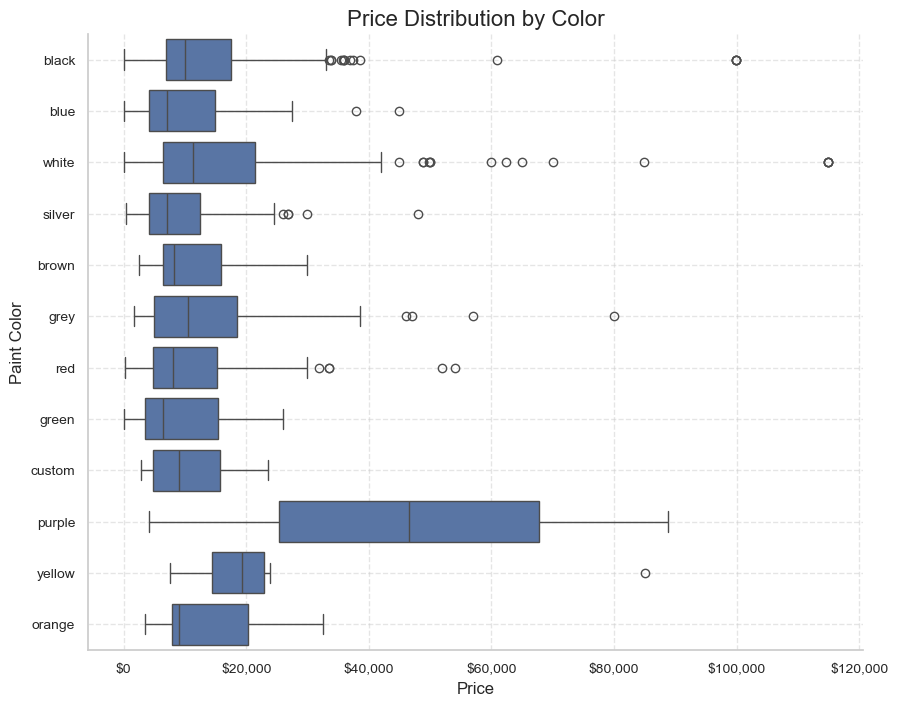

In [59]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='price', y='paint color', data=df)

# Set the title and labels
plt.title('Price Distribution by Color', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Paint Color', fontsize=12)

# Customize the tick labels
ax.set_xticklabels(['${:,.0f}'.format(x) for x in ax.get_xticks()], fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Remove the spines
sns.despine()

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()